# ЛР №3. Дослiдження варiантiв архiтектур згроткових нейронних мереж.

Импорт залежностей

In [1]:
from lib.model.inception_res_net_v2 import create_inception_res_net_v2
from lib.model.vgg import create_vgg_16
from src.visualization.plot import plot_loss_and_val_accuracy, plot_loss_and_val_loss
from src.data.mnist import create_mnist_data_generator

## Виконання роботи

1. Обрати фреймворк для виконання роботи: tensorflow чи pytorch.
2. Взяти задачу i вiдповiдний датасет з 2-ї лабораторної роботи.
3. Завантажити, виконати попередню обробку та роздiлити датасет на тренувальну, валiдацiйну та тестову вибiрки.

2024-10-16 17:41:28.313475: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-10-16 17:41:28.313498: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 96.00 GB
2024-10-16 17:41:28.313508: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 36.00 GB
2024-10-16 17:41:28.313547: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-16 17:41:28.313580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


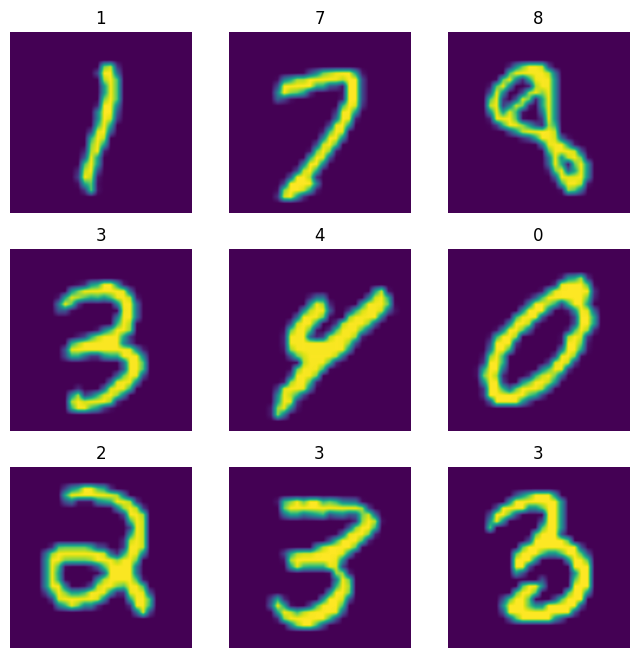

In [2]:
train_gen, valid_gen, test_gen, num_classes, input_shape = create_mnist_data_generator(
    batch_size=256, validation_split=0.1, size=(224, 224)
)

4. Реалiзувати з нуля 2 вiдомi архiтектури для вирiшення задачi класифiкацiї/регресiї:

### Реалізація 1: VGG 16

In [3]:
model = create_vgg_16(num_classes, input_shape)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

5. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU.

In [4]:
train_feedback = model.fit(train_gen, epochs=2, validation_data=valid_gen)

score = model.evaluate(test_gen, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/2


2024-10-16 17:41:57.694407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


211/211 [==============================] - 861s 4s/step - loss: 2.9019 - accuracy: 0.1038 - val_loss: 2.2982 - val_accuracy: 0.1130
Epoch 2/2
211/211 [==============================] - 851s 4s/step - loss: 2.4194 - accuracy: 0.1413 - val_loss: 2.3270 - val_accuracy: 0.0933
Test loss: 2.3271052837371826
Test accuracy: 0.0908999964594841


6. Побудувати графiки навчання (loss та точнiсть) мережi на тренувальнiй на валiдацiйнiй вибiрках. Проаналiзувати отриманi результати, виконати порiвняння моделей мiж собою та з моделлю з попередньої роботи, зробити висновки.

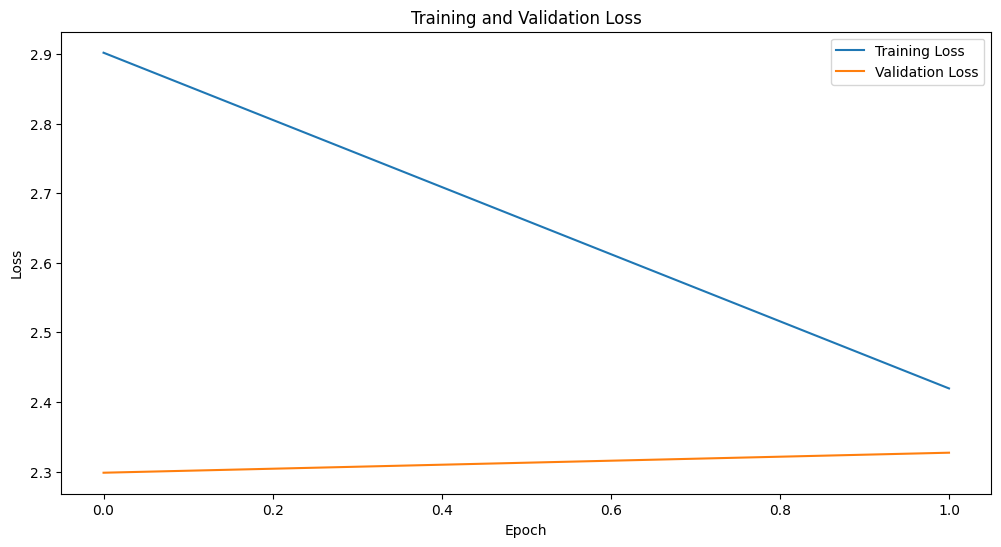

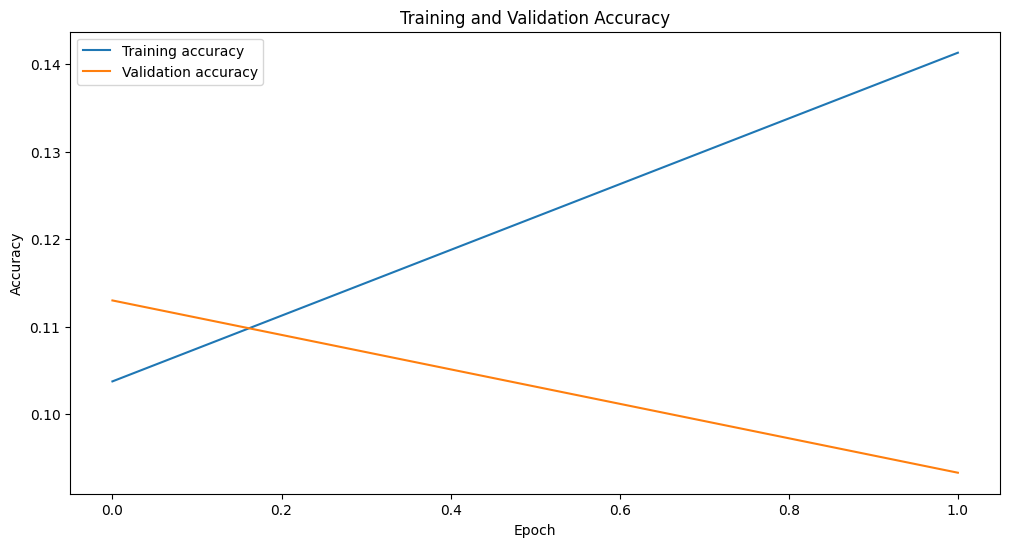

In [5]:
plot_loss_and_val_loss(train_feedback)
plot_loss_and_val_accuracy(train_feedback)

### Реалізація 2: Inception ResNet v2

In [6]:
model = create_inception_res_net_v2(num_classes, input_shape)

model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "Inception-ResNet-v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 1)]        0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 149, 149, 32)         320       ['input_2[0][0]']             
                                                                                                  
 conv2d_14 (Conv2D)          (None, 147, 147, 32)         9248      ['conv2d_13[0][0]']           
                                                                                                  
 conv2d_15 (Conv2D)          (None, 147, 147, 64)         18496     ['conv2d_14[0][0]']           
                                                                                

5. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU.

In [7]:
train_feedback = model.fit(train_gen, epochs=2, validation_data=valid_gen)

score = model.evaluate(test_gen, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/2
211/211 [==============================] - 1537s 7s/step - loss: 0.2239 - accuracy: 0.9305 - val_loss: 3.4760 - val_accuracy: 0.1098
Epoch 2/2
211/211 [==============================] - 1577s 7s/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.1977 - val_accuracy: 0.9380
Test loss: 0.19896073639392853
Test accuracy: 0.934499979019165


6. Побудувати графiки навчання (loss та точнiсть) мережi на тренувальнiй на валiдацiйнiй вибiрках. Проаналiзувати отриманi результати, виконати порiвняння моделей мiж собою та з моделлю з попередньої роботи, зробити висновки.

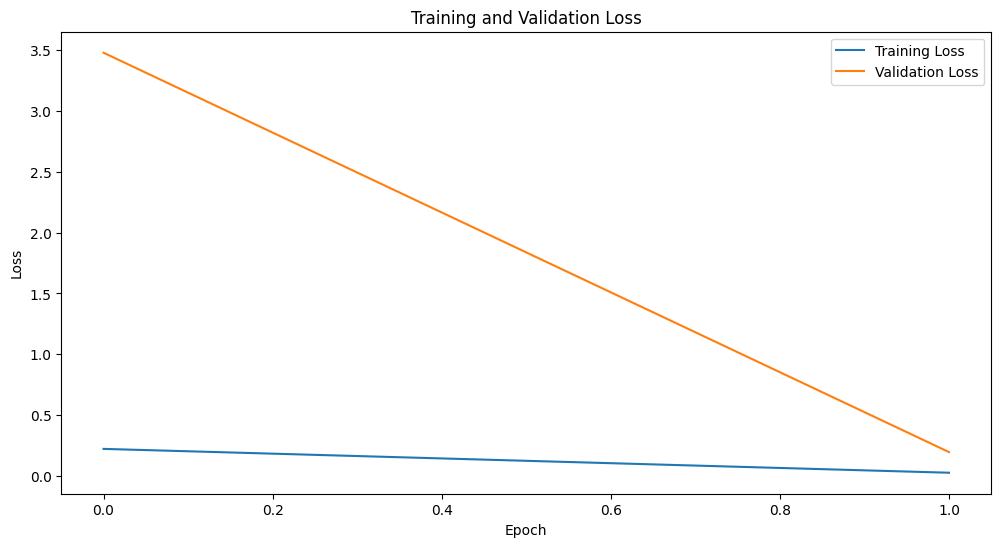

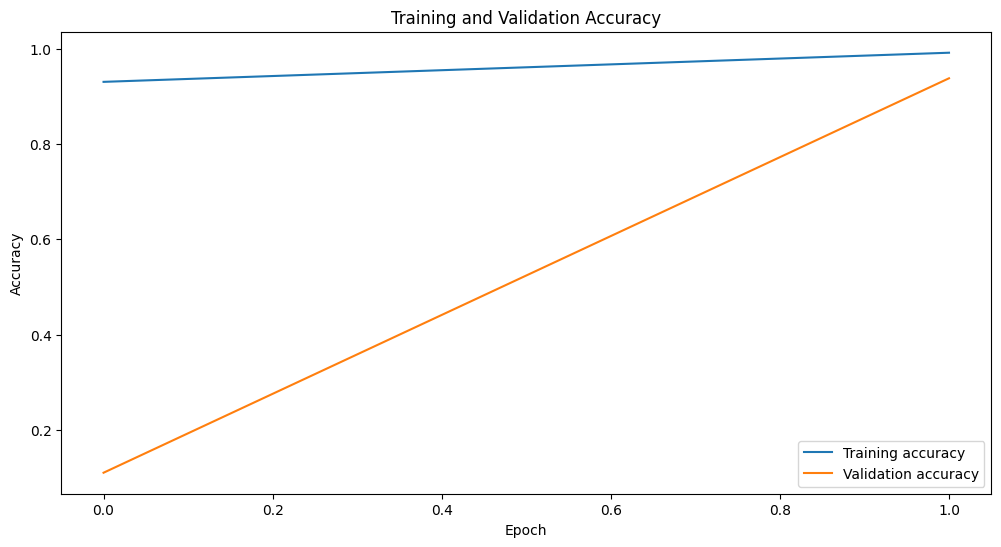

In [8]:
plot_loss_and_val_loss(train_feedback)
plot_loss_and_val_accuracy(train_feedback)